<img src="../../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Cell Types Workshop SWDB 2017 </h1> 
<h3 align="center">Wednesday, August 23, 2017</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Drive path</h2>

<p>First things first - let's make sure your drive path is set up appropriately. You will want to un-comment only one of these options depending on which operating system you are running. You also may have to tweak the option for your specific set-up (e.g. change the drive letter for Windows).
</p>
</div>

In [1]:
# please make sure your drive_path is set, so that the notebook can find the data files on the hard drive

# OS X
# drive_path = '/Volumes/Brain2016'
drive_path = '/Users/shawn/Desktop/FHL 2017/Cell Types Cache/'

# Windows (a good guess)
# drive_path = 'e:/'

# Linux (will vary; the following is possibly what Ubuntu will do)
# drive_path = '/media/Brain2016/'

# AWS
# drive_path = '/data/dynamic-brain-workshop/cell_types_cache/'

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Cell Types Database</h2>

<p>
The Cell Types database contains data derived from single-cell experiments including in vitro electrophysiological recordings from cortical slices and morphological reconstructions based on single-neuron fills.</p>

<p>
The database can be accessed [on the web](http://celltypes.brain-map.org/). This is useful for browsing and familiarizing yourself with the data, but for more in-depth analyses, it is often better to access data programmatically. The [AllenSDK](https://alleninstitute.github.io/AllenSDK/) provides Python-based tools to support that approach, and this notebook will introduce you to them.<p>

<p>
If you have not installed the `allensdk` python module yet, do so from a command prompt:</p>

<p>
   `> pip install allensdk` </p>
    
</div>

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from allensdk.core.cell_types_cache import CellTypesCache

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Create a CellTypesCache instance</h2>

<p>A CellTypesCache is used to copy and cache data from the cell types database. If you create the CellTypesCache instance with no arguments, then data is downloaded from the online repository:
</p>
</div>

In [3]:
# ctc = CellTypesCache()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Because we have limited internet bandwidth, the data you need is already provided on your external hard drive. To ensure this local data is used instead of the online repository, create the CellTypesCache instance using the `manifest_file` argument:
</p>
</div>

In [4]:
ctc = CellTypesCache(manifest_file=os.path.join(drive_path,'manifest.json'))

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Create CellTypesCache instance using the `manifest_file` on AWS:
</p>
</div>

In [5]:
# ctc = CellTypesCache(manifest_file=os.path.join(drive_path, 'cell_types_manifest.json'))

**Documentation:**
[CellTypesCache](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache),
[CellTypesCache.get_ephys_features()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_features)
[CellTypesCache.get_cells()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_cells)

                            
*Note: you can find these by using the search tool on the main [AllenSDK page](http://alleninstitute.github.io/AllenSDK/)*


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>1. Using pre-computed features: Htr3a-expressing interneurons</h2>

<p>
Let's say we're interested in looking at interneuron diversity in the mouse visual cortex. We know that interneurons can be divided into three major types based on the expression of specific molecular markers - some interneurons express parvalbumin (Pvalb), others express somatostatin (Sst), and most of the rest express the ionotropic serotonin receptor 5HT3a (Htr3a).
</p>
</div>

<img src="../../resources/Neocortical Interneurons.png">  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
We'll start by looking at the Htr3a-expressing interneurons, which have two major subpopulations - those that express vasointestinal peptide (Vip), and those that don't. Many of the non-Vip cells express neuron derived neurotrophic factor (Ndnf). In the Cell Types Database, we have cells that are labeled by transgenic lines driven by Htr3a-Cre, as well as cells with reporter expression driven by Vip-Cre and Ndnf-Cre. We can look at the properties of those cells to see if there are characteristic differences among these populations. 
</p>
<p>
We'll start by looking at pre-computed features of these cells. To access them, we'll use SDK components that interact with the database via its API.</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><strong>Exercise 1.1:</strong></p>

<p>Use the function `ctc.get_cells()` and specify the reporter_status to get all the cre reporter positive cells (we only want the cells actually labeled by the transgenic lines we're investigating). Store them in a variable named `cells`. How many cells are in the database? Does this match the number reported on the website? </p>

</div>

In [6]:
# ANSWER

cells = ctc.get_cells(reporter_status=["cre reporter positive"])
print len(cells)

889


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Selecting specific cell populations </h2>

Now we'd like to just select the cells for particular transgenic lines (i.e., Htr3a, Vip, and Ndnf). The full names of those driver lines are:
<ul>
<li> Htr3a-Cre_NO152 </li>
<li> Vip-IRES-Cre </li>
<li> Ndnf-IRES2-dgCre </li>
</ul>

<p>
If we look at an entry in our `cells` list, we can see that there are several fields that are of use to us for this task: e.g. the 'transgenic_line' key allows us to select for Cre line, 'id' is the specimen_id for this cell that allows us to connect between datasets and with metadata, and 'dendrite_type' gives us information about the presence of spines which strongly covaries with excitatory/inhibitory neuron type.
</p></div>

In [7]:
example_cell = cells[100] # cells is a list of dictionaries
print example_cell.keys()

[u'rna_integrity_number', u'weight', u'parent_y_coord', u'dendrite_type', u'has_morphology', u'parent_x_coord', u'ephys_result_id', u'data_sets', u'is_cell_specimen', u'cell_soma_locations', u'id', u'neuron_reconstructions', u'sphinx_id', u'parent_id', u'reporter_status', u'donor', u'is_ish', u'ephys_features', u'transgenic_line', u'failed_facet', u'treatment_id', u'tissue_ph', u'hemisphere', u'donor_id', u'cell_prep_sample_id', u'cell_reporter', u'data', u'structure_id', u'structure', u'parent_z_coord', u'apical', u'name', u'specimen_tags', u'has_reconstruction', u'specimen_id_path', u'cell_reporter_id', u'external_specimen_name']


In [8]:
# The specimen ID - this is a handle to refer to a specific cell in the database
print "Specimen ID:", example_cell["id"]

# The transgenic line - the driver of the mouse from which the cell was recorded
print "Transgenic line:", example_cell["transgenic_line"]

# The dendrite type - this is whether or not a given cell has dendritic spines (generally a 
# feature of excitatory neurons)
print "Dendrite type:", example_cell["dendrite_type"]

Specimen ID: 485640247
Transgenic line: Pvalb-IRES-Cre
Dendrite type: aspiny


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><strong>Exercise 1.2:</strong></p>

<p>From the `cells` list, select only the cells that are from the Htr3a-Cre_NO152 line and are not spiny. Store their specimen IDs in a new list called `htr3a_ids`. How many of these cells are there?</p>

</div>

In [9]:
# ANSWER

htr3a_ids = [c["id"] for c in cells
             if c["transgenic_line"] == "Htr3a-Cre_NO152" and
             c["dendrite_type"] != "spiny"]

print len(htr3a_ids)

87


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h3> Pandas DataFrame is useful for selecting and filtering data </h3>
</div>

**Documentation:**
[pandas.DataFrame()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html),
[Intro to pandas data structures](https://pandas.pydata.org/pandas-docs/stable/dsintro.html)


In [10]:
import pandas as pd

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><strong>Exercise 1.3:</strong></p>

<p>Make a DataFrame (`df_cells`) from the `cells` list of dictionaries. How many rows and columns does this dataframe contain?</p>

</div>

In [11]:
# ANSWER

df_cells = pd.DataFrame(cells)
print "# of rows:", df_cells.shape[0]
print "# of columns:", df_cells.shape[1]

# of rows: 889
# of columns: 37


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.4:**</p>

<p>Make a new dataframe `df_vip` by selecting from the dataframe `df_cells` only the cells that are Vip-IRES-Cre+ and are not spiny. Print id values for these cells. </p>

</div>

In [12]:
# ANSWER 

df_vip = df_cells[(df_cells.transgenic_line=='Vip-IRES-Cre') & (df_cells.dendrite_type!='spiny')]
print "VIP cell ids:", df_vip.id.values

VIP cell ids: [531121585 520347870 524876305 514767977 535728342 523478821 522418855
 501570114 524693113 523478869 523205934 524689239 501736631 515264431
 535708196 509620929]


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.5:**</p>

<p>Make a new dataframe `df_tg_cells` from `df_cells` which includes all cells from the three transgenic lines of interest here: Htr3a-Cre_NO152, Vip-IRES-Cre, Ndnf-IRES2-dgCre. Hint: use the `isin` method. Additionally, only select cells that are not 'spiny'.</p>

</div>

In [13]:
# ANSWER

line_list = ['Htr3a-Cre_NO152', 'Vip-IRES-Cre', 'Ndnf-IRES2-dgCre']
df_tg_cells = df_cells[(df_cells.transgenic_line.isin(line_list)) & (df_cells.dendrite_type!='spiny')]
print "Unique transgenic lines in dataframe: ", df_tg_cells.transgenic_line.unique()

Unique transgenic lines in dataframe:  [u'Htr3a-Cre_NO152' u'Ndnf-IRES2-dgCre' u'Vip-IRES-Cre']


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we have a table (`df_tg_cells`) with all cells labeled by our three Cre lines. Next, we'll get ephys features for the cells in the Cell Types database and extract the properties for the cells in `df_tg_cells`.
</p>
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Get Ephys Features from CellTypesCache object</h3>
<p>
We can get ephys features as a list of dictionaries. The returned data provides a record of feature values for each cell in the database, and additionally includes essential metadata about the cell (specimen_id) and experiment (id).
</p>
</div>

In [14]:
ephys_features_dict = ctc.get_ephys_features()
ephys_features_dict[0]

{'adaptation': 0.0460790482526,
 'avg_isi': 97.0,
 'electrode_0_pa': 23.797500428600003,
 'f_i_curve_slope': 0.124640301691,
 'fast_trough_t_long_square': 1.156475,
 'fast_trough_t_ramp': 6.003741666669999,
 'fast_trough_t_short_square': 1.0255275,
 'fast_trough_v_long_square': -42.0000038147,
 'fast_trough_v_ramp': -42.3541679382,
 'fast_trough_v_short_square': -46.335939407299996,
 'has_burst': False,
 'has_delay': False,
 'has_pause': False,
 'id': 478890939,
 'input_resistance_mohm': 106.45978400000001,
 'latency': 0.061110000000000005,
 'peak_t_long_square': 1.1535600000000001,
 'peak_t_ramp': 6.001371666669999,
 'peak_t_short_square': 1.0235425,
 'peak_v_long_square': 32.53125,
 'peak_v_ramp': 33.28125,
 'peak_v_short_square': 27.1562509537,
 'rheobase_sweep_id': 478889888,
 'rheobase_sweep_number': 57,
 'ri': 113.28125,
 'sag': 0.0900440961123,
 'seal_gohm': 1.5778554880000002,
 'slow_trough_t_long_square': 1.21095,
 'slow_trough_t_ramp': 6.046945,
 'slow_trough_t_short_square':

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
Now we have a table (`df_tg_cells`) with all cells labeled by our three Cre lines. Next, we'll get ephys features for the cells in the Cell Types database and extract the properties for the cells in `df_tg_cells`.
</p>
</div>

In [15]:
ephys_features_df = ctc.get_ephys_features(dataframe=True)
ephys_features_df.head(1)

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,0.046079,97.0,23.7975,0.12464,1.156475,6.003742,1.025527,-42.000004,-42.354168,-46.335939,...,6.046945,1.262538,-52.5625,-53.708337,-72.765629,3.119665,3.083533,3.068449,-85.968758,-72.388512


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Merge `df_tg_cells` with `ephys_features_df` </h2>

<p>Critical information: 
<ul> 
<li>The merge operation will generate an expanded table (new columns) keyed to the specimen_id </li>
<li> The 'id' column of `df_tg_cells` corresponds to 'specimen_id' column of `ephys_features_df` </li>
<li> how = 'left' will include only cells in left dataframe </li>
<li> Following merge, each row (i.e. cell) now includes ephys features as additional columns</li> </p>
</div>

**Documentation:**
[pandas.DataFrame.merge()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)

In [16]:
df = pd.merge(df_tg_cells,ephys_features_df,left_on='id',right_on='specimen_id',how='left')
len(df_tg_cells), len(df)

(113, 113)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>
The dataframe `df` now includes metadata and ephys features for each cell
</p>
</div>

In [17]:
df.head(2)

,apical,cell_prep_sample_id,cell_reporter,cell_reporter_id,cell_soma_locations,data,data_sets,dendrite_type,donor,donor_id,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,NA,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.592588250717, u'speci...",None,"[{u'name': u'T301-Ax.160426_01_B02_514824979',...",aspiny,"{u'mgmt_ihc': None, u'donor_race_only_facet': ...",514081111,...,2.79076,1.483350,-51.093754,-50.437502,-74.296875,2.555152,2.625650,2.980522,-99.468750,-73.296921
1,NA,None,"{u'id': 491913822, u'name': u'cre reporter pos...",491913822,"[{u'normalized_depth': 0.0240655577418, u'spec...",None,[],sparsely spiny,"{u'mgmt_ihc': None, u'donor_race_only_facet': ...",526928924,...,6.44924,1.690957,-51.062504,-52.354170,-65.880213,3.023153,3.061118,2.408996,-81.531258,-65.245323


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<p>Add column to `df` to store shorthand label for trangenic_line
</p>
</div>

In [18]:
df['tg_label'] = [x.split('-')[0] for x in df.transgenic_line.values]

In [19]:
df.tg_label.head()

0    Htr3a
1     Ndnf
2      Vip
3      Vip
4    Htr3a
Name: tg_label, dtype: object

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Examining an electrophysiological feature </h3>

<p>
Let's start by looking at something simple, like the input resistance (found in column `ri`). This reflects how much a cell will change its membrane potential for a given amount of current of current coming into the cell - cells with higher input resistances will experience a greater change in the membrane potential.

Since we have the features in a `DataFrame`, we can use the pandas plotting function to visualize the data in a histogram. </p>
</div>

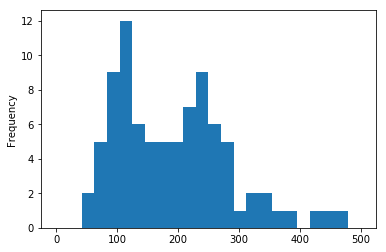

In [20]:
df[df.tg_label=='Htr3a']['ri'].plot(kind="hist", bins=np.linspace(0, 500, 25))

**Documentation:**
[pandas.Series.plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Viewing individual cells </h3>

<p>
The distribution looks multimodal - there is a peak around 100 MOhms and another around 250 MOhms. </p>

<p> Let's split up those two peaks and look at views of some individual cells. On the website, we can summarize some of the electrophysiological and morphological properties of the cells with small thumbnail representations. These thumbnails are accessible via the website, as long as you have the cell's specimen ID. </p>

<p>Not all cells have a morphological reconstruction; those that don't can't have a thumbnail. So we will need to only look at cells that have a reconstruction for this task. </p>

</div>

In [21]:
# These are the URLs for getting the thumbnails - we need to provide a specimen ID
url_morph = "http://celltypes.brain-map.org/mouse/thumbnail/morphology?id="
url_ephys = "http://celltypes.brain-map.org/mouse/thumbnail/ephys_trace?id="

# We need these objects to view PNG files from the web inside the notebook
from IPython.display import Image, display

In [22]:
# Let's get the specimen_id of the first cell in the dataframe.
unit_id = 50
specimen_id = df.specimen_id[unit_id]

# ...and plot its ephys thumbnail
url = url_ephys + str(specimen_id)
display(Image(url=url))

# We also can check whether it has a reconstruction...
print "Has reconstruction?", df.has_reconstruction[unit_id]

# ..and if so, show its morphology thumbnail

if df.has_reconstruction[unit_id]:
    url = url_morph + str(specimen_id)
    display(Image(url=url))

Has reconstruction? True


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The reconstruction thumbnails show the reconstructed axons in blue and the dendrites in red. Not all neurons have their axons reconstructed, so a lack of blue doesn't usually mean the axon is actually small - it just means the data were not available. The morphology is shown to fill the thumbnail, and the histogram on the right shows where those processes fall in the full cortical depth (top is near the pia).
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.6:**</p>

<p>Get the IDs of the Htr3a cells that both (1) have an input resistance below 150 MOhm and (2) have a morphological reconstruction. How many cells meet these criteria? Show the ephys and morphology thumbnails of those cells.
</p>

<p>When you get the results, look at the cells - which traces look similar to each other? Which are different from others? Is there any correspondence between the morphology and physiology? Can you imagine other features that may separate these cells?
</div>

In [23]:
# ANSWER 

df_sub = df[(df.tg_label=='Htr3a') & (df.has_reconstruction==True) & (df.ri<150)]
print "Number of Htr3a non-aspiny cells with reconstructions:", len(df_sub)

Number of Htr3a non-aspiny cells with reconstructions: 8


In [24]:
# ANSWER 

for index, cell in df_sub.iterrows():
    print cell.specimen_id
    url = url_ephys + str(cell.specimen_id)
    display(Image(url=url))
    url = url_morph + str(cell.specimen_id)
    display(Image(url=url))

# Things they may observe - the more superficical, compact cells have similar firing patterns.
# Fastest spiking cells are pretty compact but also deeper than the others
# The bipolar-looking cell has a transient firing pattern, unlike the others

481136138


473943881


478107198


482644550


482516216


469753383


464188580


479220013


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Comparing cell populations </h3>

<p>Let's see if the two peaks in the Htr3a input resistance distribution are consistent with the Vip+ and Ndnf+ subpopulations of Htr3a+ interneurons.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 1.7:**</p>

<p>Compare the input resistance histograms of the Htr3a, Vip, and Ndnf cells. What relationship do you see? Can you think of ways of further investigating or refining this (very preliminary) analysis?
</p>
</div>

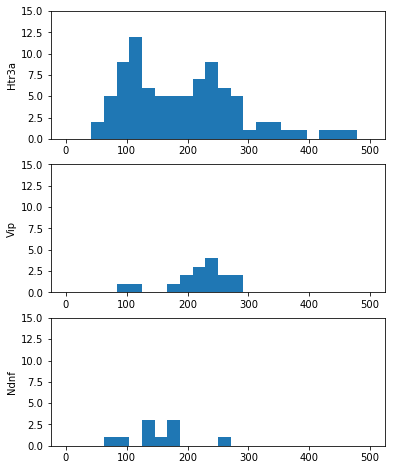

In [25]:
# ANSWER

fig, axes = plt.subplots(3, 1, figsize=(6, 8))

pops = ["Htr3a", "Vip", "Ndnf"]

for p, ax in zip(pops, axes):
    df[df.tg_label==p]["ri"].plot(kind='hist', ax=ax, bins=np.linspace(0, 500, 25))
    ax.set_ylabel(p)
    ax.set_ylim(0, 15)
    
# Vip looks like the higher peak. Ndnf cells are likely lower.
# Other ideas - look at other features, check the ephys thumbnails of Vip, Ndnf cells, etc.

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3> Exploring additional precomputed features </h3>

<p>The Cell Types database includes ~50 precomuted electrophysiological features for each cell. Some of these features are correlated with one another and this can be seen by making pairwise scatter plots.</p>
</div>

In [26]:
ephys_features_df.columns

Index([u'adaptation', u'avg_isi', u'electrode_0_pa', u'f_i_curve_slope',
       u'fast_trough_t_long_square', u'fast_trough_t_ramp',
       u'fast_trough_t_short_square', u'fast_trough_v_long_square',
       u'fast_trough_v_ramp', u'fast_trough_v_short_square', u'has_burst',
       u'has_delay', u'has_pause', u'id', u'input_resistance_mohm', u'latency',
       u'peak_t_long_square', u'peak_t_ramp', u'peak_t_short_square',
       u'peak_v_long_square', u'peak_v_ramp', u'peak_v_short_square',
       u'rheobase_sweep_id', u'rheobase_sweep_number', u'ri', u'sag',
       u'seal_gohm', u'slow_trough_t_long_square', u'slow_trough_t_ramp',
       u'slow_trough_t_short_square', u'slow_trough_v_long_square',
       u'slow_trough_v_ramp', u'slow_trough_v_short_square', u'specimen_id',
       u'tau', u'threshold_i_long_square', u'threshold_i_ramp',
       u'threshold_i_short_square', u'threshold_t_long_square',
       u'threshold_t_ramp', u'threshold_t_short_square',
       u'threshold_v_long_squa

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Plot two features againts one another
</div>

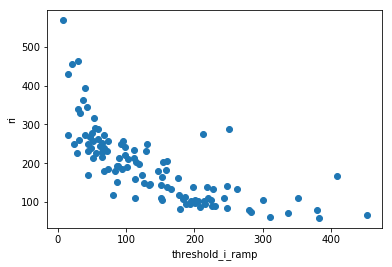

In [27]:
plt.plot(df['threshold_i_ramp'],df['ri'],'o')
plt.xlabel('threshold_i_ramp')
plt.ylabel('ri')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Use <strong>seaborn</strong> package to easily make a grid of pairwise feature plots

</div>

In [28]:
import seaborn as sns

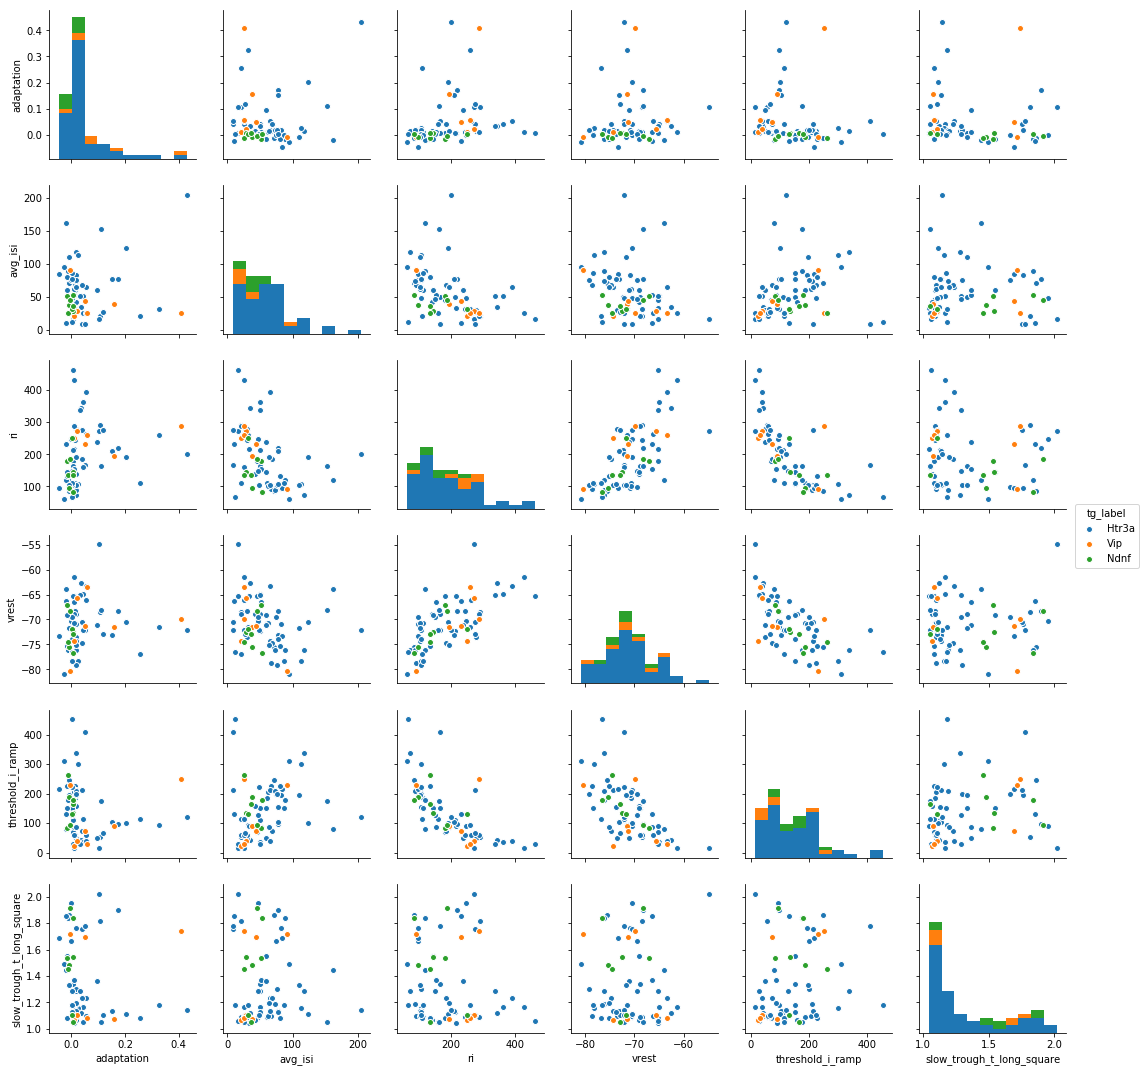

In [29]:
# List of features to include in pairwise grid
features = ['adaptation',
            'avg_isi',
            'ri',
            'vrest',
            'threshold_i_ramp',
            'slow_trough_t_long_square',
            'tg_label']

df_tmp = df[features]
df_tmp = df_tmp.dropna() # Drop rows that include NaN value in any column
sns.pairplot(df_tmp,hue='tg_label')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p><strong>Exercise 1.8:</strong></p>

<p>Make a new dataframe that contains cell data for the entire database (hint: merge `df_cells` with `ephys_features_df`). Make a scatter plot of features with 'spiny' and 'aspiny' cells shown in different colors. There are ~50 precomputed features to choose from--as starting point plot pairwise combinations of these features:
<ul>
<li>upstroke_downstroke_ratio_ramp</li>
<li>ri</li>
<li>threshold_i_ramp</li>
<li>slow_trough_t_long_square</li>
<li>log_avg_isi (Derive this new feature by adding a column to the dataframe and storing the computation log(avg_isi))</li></ul>
</p>
</div>

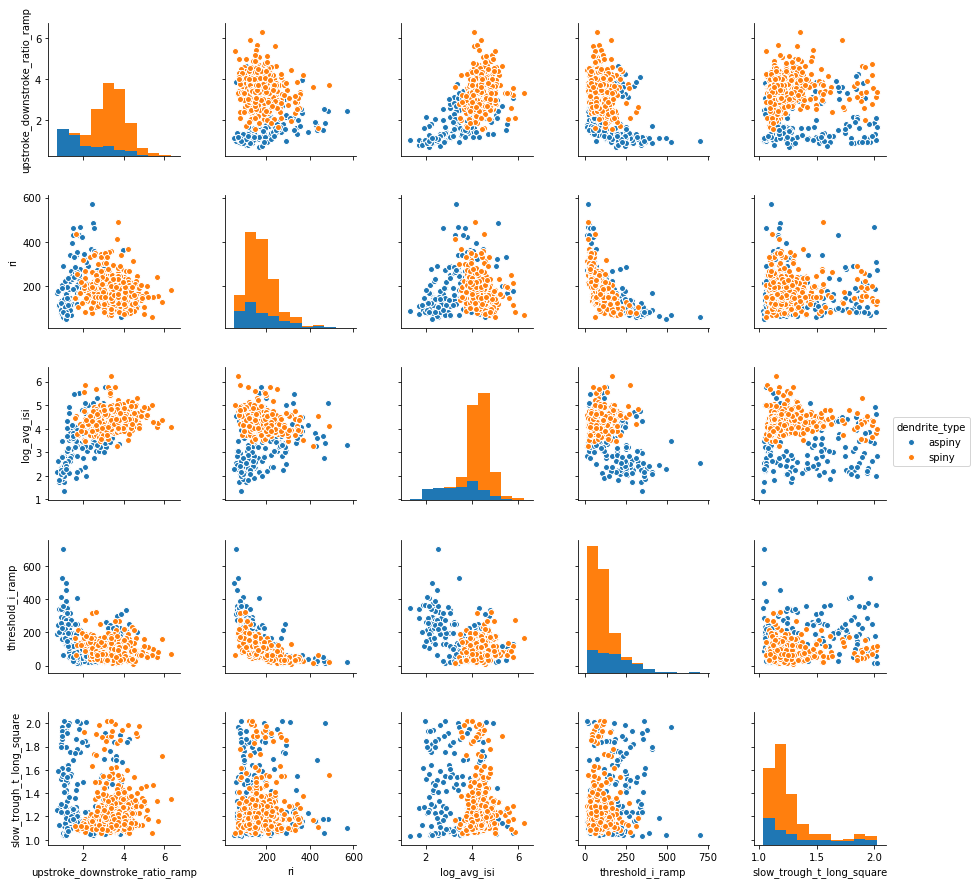

In [30]:
# ANSWER 

df2 = pd.merge(df_cells,ephys_features_df,left_on='id',right_on='specimen_id',how='left')
df2 = df2[df2.dendrite_type.isin(['spiny','aspiny'])]
df2['log_avg_isi'] = np.log(df2.avg_isi)

features = ['upstroke_downstroke_ratio_ramp',
            'ri',
            'log_avg_isi',
            'threshold_i_ramp',
            'slow_trough_t_long_square',
            'dendrite_type']

df_tmp = df2[features]
df_tmp = df_tmp.dropna()
sns.pairplot(df_tmp,hue='dendrite_type')

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>2. Analyzing electrophysiology sweeps</h2>

<p>
Now we'll look at a different class of interneurons - the somatostatin-positive (Sst) cells. As we've seen, there are many features pre-calculated in the Allen Cell Types Database, but it may not have everything we're interested in looking at from the original data. For example, let's look at two Sst cells where we think we see a difference in the shape of the membrane potential response in between action potentials.
</p>
</div>

In [31]:
example_sst_ids = [475049291, 313862274]
for specimen_id in example_sst_ids:
    print specimen_id
    url = url_ephys + str(specimen_id)
    display(Image(url=url))

475049291


313862274


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
We may not have a feature that illustrates this difference in the "sharpness" of the interspike interval shape. If we want to calculate other electrophysiology features, we'll need to look at where the data are stored - the NWB (Neurodata Without Borders) files. Each recorded cell has its own NWB file.
</p>
</div>

In [32]:
cells = ctc.get_cells(reporter_status=["cre reporter positive"])

In [33]:
## this saves the NWB file to 'specimen_464212183/ephys.nwb' (or just gives a handle if you already saved it)
specimen_id = 464212183
data_set = ctc.get_ephys_data(specimen_id)

**Documentation:**
[CellTypesCache](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache),
[CellTypesCache.get_ephys_data()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_data)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<p>
The electrophysiological data in a Cell Types NWB file is organized by "sweeps." These sweeps represent specific periods during which a single stimulus is applied to the cell and the response is recorded. Different types of stimuli can be applied to the cell, and similar stimuli are grouped by type on the web app. For example, one-second long step current injections are grouped together under the name "Long Squares." We refer to sweeps by their number, which are integers indicating the order in which the sweeps were collected.</p>

<p>
There are typically periods of time during an experiment between sweeps; this may be due to the experimentalist making some on-line adjustments, or may be intentional to allow the cell to return to some baseline after an intense stimulus. </p>

<p>
Returning to the example, we now have an object called `data_set` that provides access to the data in the NWB file through built-in methods. We can access sweep-level data like this:</p>
</div>

In [34]:
sweep_number = 30
sweep_data = data_set.get_sweep(sweep_number)

**Documentation:**
[NwbDataSet](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.nwb_data_set.NwbDataSet), [NwbDataSet.get_sweep()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.nwb_data_set.NwbDataSet.get_sweep)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.1:**</p>

<p>`data_set.get_sweep()` returns a dict with several key/value pairs. What are the data types of these values?</p>

</div>

In [35]:
# ANSWER

for k, v in sweep_data.iteritems():
    print k, type(v)

stimulus <type 'numpy.ndarray'>
index_range <type 'tuple'>
response <type 'numpy.ndarray'>
sampling_rate <type 'numpy.float64'>


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Getting sweeps from an NWB file</h3>

<p>Most of the sweeps in the Cell Types Database are recorded in current-clamp mode, meaning that a current stimulus is injected into the recorded cell, and a voltage response is recorded. The current data is stored in the NWB file in amperes, and the voltage data is in volts. However, it is usually more convenient to work with the data in picoamps and millivolts.</p>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.2:**</p>

<p>Write code to put the stimulus (current) and response (voltage) from the sweep into variables `i` and `v`, respectively. Convert their units to pA and mV (the raw data are expressed in unscaled units).</p>
</div>

In [36]:
# ANSWER

i = sweep_data["stimulus"] * 1e12
v = sweep_data["response"] * 1e3

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The time points are not included in the NWB file as a waveform, but we can generate one based on the sampling rate:
</div>

In [37]:
sampling_rate = sweep_data["sampling_rate"] # in Hz

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.3:**</p>

<p>Create a new array `t` that is the same length as `v` and `i` and contains the correct time points (in seconds) according to the sampling rate.</p>

<p>See: [numpy.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)</p>
</div>

In [38]:
t = np.arange(len(v)) * 1. / sampling_rate

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Finally, we can plot the data to see what it looks like.
</div>

[<matplotlib.text.Text at 0x11d93c650>, <matplotlib.text.Text at 0x11d694bd0>]

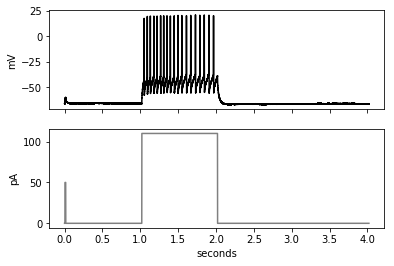

In [39]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set(ylabel="mV")
axes[1].set(ylabel="pA", xlabel="seconds")

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Calculating features of the ephys data</h3>

<p>
Plotting the data is great, but if we want to do some analysis on things like spike times, spike shapes, etc., we want to go through and extract these features from our raw data. This can be accomplished by using the feature extraction tools in the SDK.</p>
</div>

In [40]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

# This finds and analyzes features of spikes
sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()

# We can pull out some information from the sweep_ext object once that processing is done
print "Avg spike threshold: {:.1f} mV".format(sweep_ext.spike_feature("threshold_v").mean())
print "Avg spike width: {:.2f} ms".format(1e3 * np.nanmean(sweep_ext.spike_feature("width")))

Avg spike threshold: -37.8 mV
Avg spike width: 0.88 ms


**Documentation:**
[EphysSweepFeatureExtractor](http://alleninstitute.github.io/AllenSDK/allensdk.ephys.html#allensdk.ephys.ephys_extractor.EphysSweepFeatureExtractor)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

The method `spike_feature()` returns a NumPy array of features for each spike. You pass it the name of the feature that you want. Features that can't be calculated for a given spike are set to `NaN`.

We can take a look at all the properties calculated for each spike by the extractor:</div>

In [41]:
sweep_ext.spike_feature_keys()

['threshold_index',
 'threshold_t',
 'threshold_v',
 'threshold_i',
 'peak_index',
 'peak_t',
 'peak_v',
 'peak_i',
 'trough_index',
 'trough_t',
 'trough_v',
 'trough_i',
 'downstroke_index',
 'downstroke',
 'downstroke_t',
 'downstroke_v',
 'upstroke_index',
 'upstroke',
 'upstroke_t',
 'upstroke_v',
 'isi_type',
 'fast_trough_index',
 'fast_trough_t',
 'fast_trough_v',
 'fast_trough_i',
 'slow_trough_index',
 'slow_trough_t',
 'slow_trough_v',
 'slow_trough_i',
 'adp_index',
 'adp_t',
 'adp_v',
 'adp_i',
 'width',
 'upstroke_downstroke_ratio']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can look at when the spikes occur by looking at the `threshold_t` property (i.e., time of spike threshold).</div>

In [42]:
spike_times = sweep_ext.spike_feature("threshold_t")

print spike_times[:5]  # print just the first 5 spike times

[ 1.05078   1.09248   1.13249   1.179015  1.221835]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

Spike times and numbers of spikes are actually something that have already been calculated and stored elsewhere - if you're looking to get numbers of spikes for a big set of cells and/or sweeps, it's probably faster to get them via the database rather than re-calculating them all.</div>

In [43]:
# Get a dictionary of data about each sweep
sweep_info = ctc.get_ephys_sweeps(specimen_id)
sweep_info[0]

{u'bridge_balance_mohm': 0.0,
 u'id': 464306827,
 u'leak_pa': 0.0,
 u'num_spikes': 0,
 u'peak_deflection': None,
 u'post_noise_rms_mv': 0.0,
 u'post_vm_mv': 0.0,
 u'pre_noise_rms_mv': 0.0,
 u'pre_vm_mv': 0.0,
 u'slow_noise_rms_mv': 0.0,
 u'slow_vm_mv': 0.0,
 u'specimen_id': 464212183,
 u'stimulus_absolute_amplitude': 9.99999977648258,
 u'stimulus_description': u'EXTPSMOKET141203[0]',
 u'stimulus_duration': 0.069995,
 u'stimulus_interval': 0.05,
 u'stimulus_name': u'Test',
 u'stimulus_relative_amplitude': 1.0,
 u'stimulus_start_time': 0.03,
 u'stimulus_units': u'Volts',
 u'sweep_number': 0,
 u'vm_delta_mv': 0.0}

In [44]:
# Find the sweeps that use the "Long Square" protocol
ls_sweeps = [s for s in sweep_info
             if s["stimulus_name"] == "Long Square"]

In [45]:
# Print the number of spikes and stimulus amplitude
for sweep in ls_sweeps:
    print np.round(sweep["stimulus_absolute_amplitude"]), sweep["num_spikes"]

-110.0 None
-90.0 None
-70.0 None
-50.0 None
-30.0 None
-10.0 None
10.0 None
30.0 None
50.0 None
70.0 None
90.0 9
110.0 19
130.0 27
150.0 34
170.0 42
190.0 48
210.0 55
230.0 61
80.0 2
70.0 1
60.0 None


**Documentation:**
[CellTypesCache.get_ephys_sweeps()](http://alleninstitute.github.io/AllenSDK/allensdk.core.html#allensdk.core.cell_types_cache.CellTypesCache.get_ephys_sweeps)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h3>Getting the interspike interval (ISI) membrane potential shape for Sst cells</h3>

<p>Now we have the tools we need to derive ISI membrane potential information from our Sst (Cre line name: Sst-IRES-Cre) cells.</p>

<p>Let's start by getting the cell IDs for Sst cells from the complete list of `cells`.</p>

</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.4:**</p>

<p>Store the IDs of the non-spiny, Sst+ cells in a list called `sst_ids`. How many Sst cells are there?</p>

</div>

In [46]:
# ANSWER

sst_ids = [c["id"] for c in cells
                       if c["transgenic_line"] == "Sst-IRES-Cre" and
                       c["dendrite_type"] != "spiny"]

print len(sst_ids)

110


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>The shape of the ISI can change depending on how fast the cell is firing, so if we want to be consistent across cells, we should look for sweeps of a similar firing rate. But what level should that be?</p>

<p>We can look to the data to give us some idea.</p>

</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>For the first cell in the `sst_ids` list, plot the number of spikes against the stimulus amplitude for the sweeps that:</p>

<ul>
<li>Are "Long Square" type
<li>Have a positive stimulus amplitude
<li>Have at least one spike
</ul>
</div>

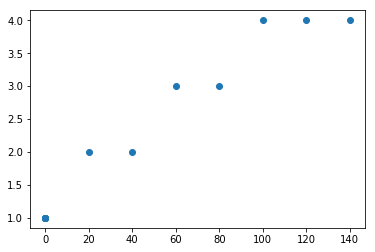

In [47]:
example_id = sst_ids[20]
dataset = ctc.get_ephys_data(example_id)

sweep_info = ctc.get_ephys_sweeps(example_id)

ls_sweeps = [s for s in sweep_info
             if s["stimulus_name"] == "Long Square"
             and s["num_spikes"] > 0
             and s["stimulus_absolute_amplitude"] > 0]

amps = [np.round(s["stimulus_absolute_amplitude"]) for s in ls_sweeps]
amps -= np.min(amps) # Align data to minimum stimulus that evokes a response
n_spikes = [s["num_spikes"] for s in ls_sweeps]

plt.plot(amps, n_spikes, 'o')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.5:**</p>

<p>Now, do the same thing for every Sst cell, and plot them all on the same plot. Use transparency (`alpha`) to help with overlaying so much data.
</div>

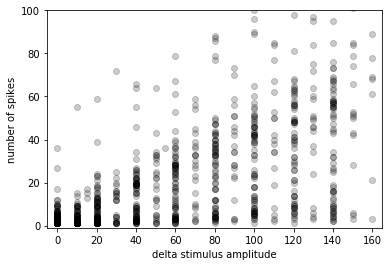

In [48]:
# ANSWER

for specimen_id in sst_ids:
    dataset = ctc.get_ephys_data(specimen_id)
    sweep_info = ctc.get_ephys_sweeps(specimen_id)

    ls_sweeps = [s for s in sweep_info
                 if s["stimulus_name"] == "Long Square"
                 and s["num_spikes"] > 0
                 and s["stimulus_absolute_amplitude"] > 0]

    # We are rounding because the floating point values can be weird
    # and we know that the amplitudes are integer-valued
    amps = [np.round(s["stimulus_absolute_amplitude"]) for s in ls_sweeps]
    
    # I don't know why this would be true but it seems like it
    # happens for some cell on the hard drive from last year
    if len(amps) < 1: 
        continue

    amps -= np.min(amps)

    n_spikes = [s["num_spikes"] for s in ls_sweeps]

    plt.plot(amps, n_spikes, 'o', c='k', alpha=0.2)
    
    plt.ylim(-1,100)
    plt.xlim(-5,165)
    plt.xlabel('delta stimulus amplitude')
    plt.ylabel('number of spikes')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.6:**</p>

<p>Create a `dict` called `sweep_matches` and populate it with the sweep_number of the long square sweep that has a firing rate closest to 10 spikes/sec (use the specimen ID as the key).</p>
<p>However, don't include any sweeps that have less than 3 spikes (so for each sweep have at least 2 ISI events to average).</p></div>

In [49]:
# Answer

target_rate = 10

sweep_matches = {}

for specimen_id in sst_ids:
    sweep_info = ctc.get_ephys_sweeps(specimen_id)

    ls_sweeps = [s for s in sweep_info
                 if s["stimulus_name"] == "Long Square"
                 and s["num_spikes"] > 0
                 and s["stimulus_absolute_amplitude"] > 0]
    
    # Again, some problem cell on the hard drive
    if len(ls_sweeps) < 1:
        continue
    
    spike_rates = np.array([s["num_spikes"] for s in ls_sweeps])
    spike_rate_delta = np.abs(spike_rates - target_rate)
    match_index = np.argmin(spike_rate_delta)
    if ls_sweeps[match_index]["num_spikes"] < 3:
        continue
    sweep_matches[specimen_id] = ls_sweeps[match_index]["sweep_number"]


**Documentation:**
[numpy.abs()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html), [numpy.argmin()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">


<p>We can now use the feature extractor to find the features of the spikes that will let us identify the interspike intervals. We'll define it as extending from the end of a spike (found in the feature called "`fast_trough_index`")  and the beginning of the next spike (found in the feature called "`threshold_index`".</p>

<p>
Here's a function that will calculate the average ISI. Look it over carefully and try to figure out what is happening at each step.</p>
</div>

In [50]:
from scipy import stats

def average_isi_trajectory(dataset, sweep_num, n_points=100):
    """Average the membrane potential trajectory between spikes
    
    Parameters
    ----------
    dataset: NwbDataSet
        Data set with the ephys sweeps
    sweep: int
        Sweep number
    n_points: int
        Number of points for the resampled trace (default 100)
        
    Returns
    -------
    avg_isi: ndarray
        Averaged interspike interval membrane potential
    """
    sweep = dataset.get_sweep(sweep_num)
    
    # Extract the data from the sweep
    v = sweep["response"] * 1e3 # to mV
    t = np.arange(len(v)) / sweep["sampling_rate"] # in seconds
    
    # For Long Squares, the stimulus begins at 1.02 s and ends at 2.02 s
    ext = EphysSweepFeatureExtractor(v=v, t=t, start=1.02, end=2.02)
    
    # TODO: there's a bug in the SDK extractor we need to track down
    try:
        ext.process_spikes()
    except:
        return None
    
    # Get the starts and ends of the spikes
    threshold_indexes = ext.spike_feature("threshold_index").astype(int)
    fast_trough_indexes = ext.spike_feature("fast_trough_index").astype(int)

    # We'll store the arrays in a list so we can average them afterwards
    isis = [] 
    
    # Get the end of a spike and the start of the next one spike
    # Note the offsets in indexing of the fast_trough_indexes and threshold_indexes
    # We're using zip() to pair up the appropriate values
    for start, end in zip(fast_trough_indexes[:-1], threshold_indexes[1:]):
        v_slice = v[start:end]
        t_slice = t[start:end]
        
        # We use scipy.stats.binned_statistic() to resample to n_points
        binned, _, _ = stats.binned_statistic(t_slice, v_slice, bins=n_points)
        isis.append(binned)
    
    # We put the different ISIs on top of each other with np.vstack()
    # then average down the column with mean(axis=0)
    avg_isi = np.vstack(isis).mean(axis=0)
    return avg_isi


**Documentation:**
[zip()](https://docs.python.org/2/library/functions.html#zip), [scipy.stats.binned_statistic()](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.binned_statistic.html),
[numpy.vstack()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.7:**</p>

<p>Use the above function to populate a `dict` called `isi_traces` (keyed on specimen IDs) with the average ISI from the sweeps in `sweep_matches`. Plot them on top of each other (use transparency to help with overplotting).</p></div>

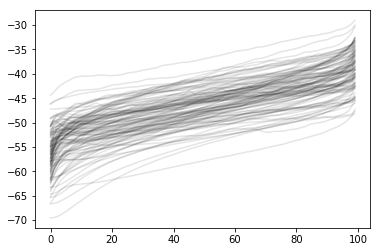

In [51]:
# ANSWER

isi_traces = {}
for specimen_id, sweep_num in sweep_matches.iteritems():
    dataset = ctc.get_ephys_data(specimen_id)
    avg_isi = average_isi_trajectory(dataset, sweep_num,n_points=100)
    if avg_isi is not None:
        isi_traces[specimen_id] = avg_isi
    
for avg_isi in isi_traces.values():
    plt.plot(avg_isi, c="k", alpha=0.1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.8:**</p>

<p>You may be able to see some differences in the ISI shape, but, again, aligning the data may improve your ability to see patterns. Plot these traces again, but normalize the voltage so that they all start at 0 and end at 1.</p></div>

(-0.1, 1.1)

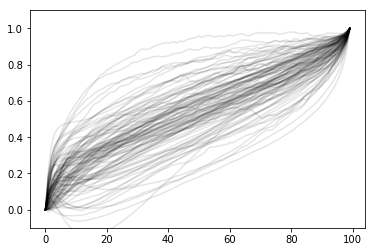

In [52]:
# ANSWER
n_avg = []
for avg_isi in isi_traces.values():
    norm_avg_isi = (avg_isi - avg_isi[0]) / (avg_isi[-1] - avg_isi[0])
    n_avg.append(norm_avg_isi)
    plt.plot(norm_avg_isi, c="k", alpha=0.1)
    
n_avg = np.array(n_avg)

plt.ylim(-0.1,1.1)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Exercise 2.9:**</p>

<p>This is the last exercise, and it is intentionally open-ended.</p>

<p>Try to think of a feature (i.e. a number or maybe a set of numbers) that would capture the differences you see in the ISI shape. You may need to do something like average a particular interval or take the derivative of the trace.</p>

<p>Implement your feature calculation in a function and apply it to the traces. See if it separates the cells as you think it should - you can plot the ephys thumbnails as we did above as one way of checking for that.</p>

<p>Future directions you can go could be things like:</p>

<ul>
<li>Does this ISI shape difference correlate with other things I know about the cell (its depth in cortex? its morphology? other electrophysiological features?)?
<li>How much does the feature you created change within a given cell as the stimulus amplitude changes?
<li>Are differences more pronounced at lower spike rates? Higher spike rates?
</ul>

</div>

(90, 98)

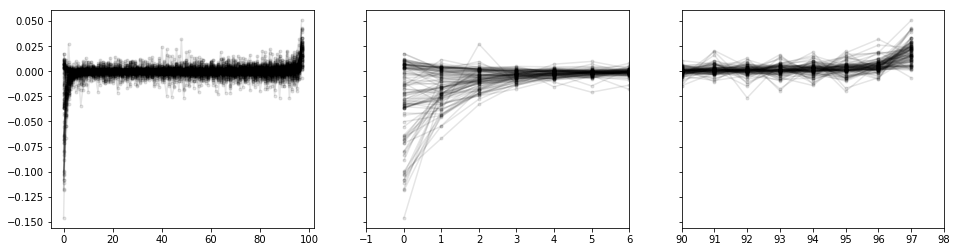

In [53]:
# ANSWER
fig,axes = plt.subplots(1,3,sharey=True)
fig.set_size_inches(16,4)
for ax in axes:
    for avg_isi in n_avg:
        ax.plot(np.diff(avg_isi,n=2),'.-', c="k",alpha=0.1)

# axes[0].set_ylim(-0.02,0.2)
axes[0].set_xlim(-5,102)
axes[1].set_xlim(-1,6)
axes[2].set_xlim(90,98)

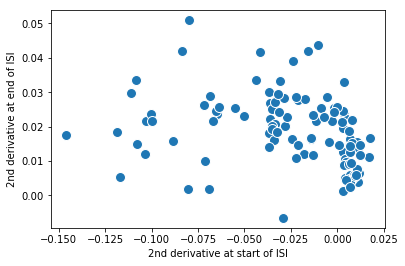

In [54]:
# ANSWER
avg_isi_diff = np.diff(n_avg,n=2)
plt.plot(avg_isi_diff[:,0],avg_isi_diff[:,-1],'o',
         markersize=10,markeredgewidth=1,markeredgecolor='white')
# plt.xlim(-0.01,0.2)
plt.xlabel('2nd derivative at start of ISI')
plt.ylabel('2nd derivative at end of ISI')

### PROJECT IDEAS

* Examine how ephys / morph features vary across Cre-line and/or cortical layer
* Attempt to classify cells using ephys data/features (e.g., use machine learning to predict Cre line)
* Perform classification of cells based on ephys features extracted from the experimental data and then from biophysical models; compare the two taxonomies.
* Engineer new features or feature combinations from the raw data and see how they affect classification results. (For example, additional quantitative measures of evoked firing with sustained depolarization).
* Investigate correlations between ephys features and morphological features (for the latter, create your own as necessary).
* Look at whether truncation of apical dendrites is linked to differences in any ephys features
* Investigate whether electrophysiological cell features systematically vary across the anterior-posterior or medial-lateral dimensions of the primary visual cortex. 
* Characterize the temporal precision and reliability of spiking responses to repeated sweeps of the noise stimulus. How consistent are evoked spike trains within vs between cells? Determine whether different cell populations (e.g. different Cre lines) vary consistently in their reliability/precision.  Do any electrophysiological or morphological features correlate with the temporal reliability of spiking.
* Our electrophysiology recordings are 30 minutes long. We apply stringent versions of the most common cited quality control parameters in the neuroscience literature (based on access resistance, bias current, etc). But these are largely used for historical reasons, and there still could be measurable changes in the cell’s extracted features within the 30 minutes of recording (drift or perhaps variability). Determine whether features extracted from the beginning vs later in the recording are, and whether certain Cre lines are more sensitive to this problem than others.
* Calculate “dendrite density clouds” after orienting and averaging morphologies
* Look for correlations between ephys data and Gene Expression and Taxonomy in V1
* Connect Brain Observatory functional properties to ephys intrinsic properties



### FUNCTION IDEAS

* cells for a given cre line
* plot a set of cell thumbnails in a notebook via the web
* v, i, and t for a given sweep & data set